## VAZOS DE PRESSÃO
---
### CALCULO DE CASCOS CILINDRICOS - PRESSÃO INTERNA ADMISSIVEL // TAXA DE CORROSÃO
---

| Norma Internacional | Norma Nacional |
|:---:|:---:|
| ASME 08 | NR13 |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

##### Criando Tabela

In [2]:
Table = pd.DataFrame()

#### Pressão Interna dos Cilindros
##### Preenchendo Tabela Com Dados

In [3]:
Table['Pressão (mpta)'] = [1, 1.1, 0.9, 1.2]
Table['Raio (mm)'] = [500, 600, 480, 320]
Table['S'] = [103, 100, 101, 105]
Table['E (fator)'] = [0.7, 0.5, 0.6, 0.7]

Table

,Pressão (mpta),Raio (mm),S,E (fator)
0,1.0,500,103,0.7
1,1.1,600,100,0.5
2,0.9,480,101,0.6
3,1.2,320,105,0.7


##### Tickness com Solda Longitudinal // PMTA com Solda Longitudinal

In [4]:
(Table['Pressão (mpta)'] * Table['Raio (mm)'])

0    500.0
1    660.0
2    432.0
3    384.0
dtype: float64

In [5]:
Table['T1'] = (Table['Pressão (mpta)'] * Table['Raio (mm)']) / ((Table['S'] * Table['E (fator)']) - (0.6 * 1))
Table

,Pressão (mpta),Raio (mm),S,E (fator),T1
0,1.0,500,103,0.7,6.993007
1,1.1,600,100,0.5,13.360324
2,0.9,480,101,0.6,7.200000
3,1.2,320,105,0.7,5.267490


In [6]:
Table['PMTA_1'] = (Table['S'] * Table['E (fator)'] * Table['T1']) / (Table['Raio (mm)'] + (0.6 * Table['T1']))
Table['BAR_1'] = Table['PMTA_1'] * 10
Table

,Pressão (mpta),Raio (mm),S,E (fator),T1,PMTA_1,BAR_1
0,1.0,500,103,0.7,6.993007,1.000000,10.000000
1,1.1,600,100,0.5,13.360324,1.098682,10.986816
2,0.9,480,101,0.6,7.200000,0.900892,9.008920
3,1.2,320,105,0.7,5.267490,1.198044,11.980440


##### Tickness sem Solda Longitudinal // PMTA sem Solda Longitudinal

In [7]:
Table['T2'] = (Table['Pressão (mpta)'] * Table['Raio (mm)']) / ((2 * Table['S'] * Table['E (fator)']) - (0.4 * 1))
Table

,Pressão (mpta),Raio (mm),S,E (fator),T1,PMTA_1,BAR_1,T2
0,1.0,500,103,0.7,6.993007,1.000000,10.000000,3.477051
1,1.1,600,100,0.5,13.360324,1.098682,10.986816,6.626506
2,0.9,480,101,0.6,7.200000,0.900892,9.008920,3.576159
3,1.2,320,105,0.7,5.267490,1.198044,11.980440,2.619372


In [8]:
Table['PMTA_2'] = (2 * Table['S'] * Table['E (fator)'] * Table['T2']) / (Table['Raio (mm)'] + (0.6 * Table['T1']))
Table['BAR_2'] = Table['PMTA_2'] * 10
Table

,Pressão (mpta),Raio (mm),S,E (fator),T1,PMTA_1,BAR_1,T2,PMTA_2,BAR_2
0,1.0,500,103,0.7,6.993007,1.000000,10.000000,3.477051,0.994437,9.944367
1,1.1,600,100,0.5,13.360324,1.098682,10.986816,6.626506,1.089857,10.898568
2,0.9,480,101,0.6,7.200000,0.900892,9.008920,3.576159,0.894926,8.949258
3,1.2,320,105,0.7,5.267490,1.198044,11.980440,2.619372,1.191506,11.915063


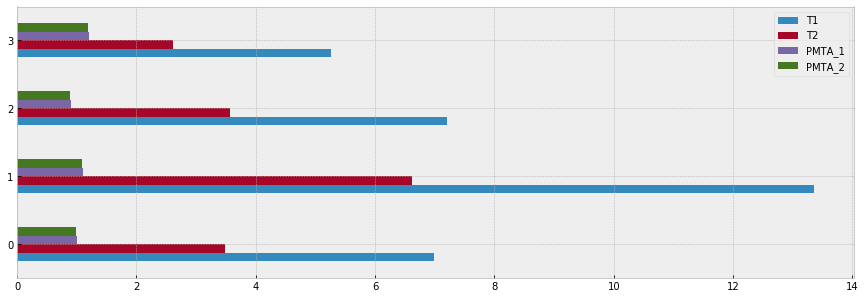

In [9]:
Table[['T1', 'T2', 'PMTA_1', 'PMTA_2']].plot(kind='barh', figsize=(15, 5))
plt.show()

##### Taxa de Corrosão

In [10]:
### Apenas Supondo uma espessura para elaborar o Calculo : Preencher com Dados Reais
Table['T_Original'] = ((Table['T1'] + Table['T2']) / 2) * 1.8
Table['T_Min_Operacao'] = ((Table['T1'] + Table['T2']) / 2) * 0.81
Table['Tempo'] = [4, 3, 5, 2.5]
Table

,Pressão (mpta),Raio (mm),S,E (fator),T1,PMTA_1,BAR_1,T2,PMTA_2,BAR_2,T_Original,T_Min_Operacao,Tempo
0,1.0,500,103,0.7,6.993007,1.000000,10.000000,3.477051,0.994437,9.944367,9.423053,4.240374,4.0
1,1.1,600,100,0.5,13.360324,1.098682,10.986816,6.626506,1.089857,10.898568,17.988147,8.094666,3.0
2,0.9,480,101,0.6,7.200000,0.900892,9.008920,3.576159,0.894926,8.949258,9.698543,4.364344,5.0
3,1.2,320,105,0.7,5.267490,1.198044,11.980440,2.619372,1.191506,11.915063,7.098176,3.194179,2.5


In [11]:
Table['Taxa de Corrosao_1'] = (Table['T_Original'] - Table['T1']) / Table['Tempo']
Table['Taxa de Corrosao_2'] = (Table['T_Original'] - Table['T2']) / Table['Tempo']
Table

,Pressão (mpta),Raio (mm),S,E (fator),T1,PMTA_1,BAR_1,T2,PMTA_2,BAR_2,T_Original,T_Min_Operacao,Tempo,Taxa de Corrosao_1,Taxa de Corrosao_2
0,1.0,500,103,0.7,6.993007,1.000000,10.000000,3.477051,0.994437,9.944367,9.423053,4.240374,4.0,0.607511,1.486500
1,1.1,600,100,0.5,13.360324,1.098682,10.986816,6.626506,1.089857,10.898568,17.988147,8.094666,3.0,1.542608,3.787214
2,0.9,480,101,0.6,7.200000,0.900892,9.008920,3.576159,0.894926,8.949258,9.698543,4.364344,5.0,0.499709,1.224477
3,1.2,320,105,0.7,5.267490,1.198044,11.980440,2.619372,1.191506,11.915063,7.098176,3.194179,2.5,0.732274,1.791521


In [12]:
Table['Vida Remanescente_1'] = (Table['T1'] - Table['T_Min_Operacao']) / Table['Taxa de Corrosao_1']
Table['Vida Remanescente_2'] = (Table['T1'] - Table['T_Min_Operacao']) / Table['Taxa de Corrosao_2']
Table

,Pressão (mpta),Raio (mm),S,E (fator),T1,PMTA_1,BAR_1,T2,PMTA_2,BAR_2,T_Original,T_Min_Operacao,Tempo,Taxa de Corrosao_1,Taxa de Corrosao_2,Vida Remanescente_1,Vida Remanescente_2
0,1.0,500,103,0.7,6.993007,1.000000,10.000000,3.477051,0.994437,9.944367,9.423053,4.240374,4.0,0.607511,1.486500,4.530999,1.851754
1,1.1,600,100,0.5,13.360324,1.098682,10.986816,6.626506,1.089857,10.898568,17.988147,8.094666,3.0,1.542608,3.787214,3.413478,1.390378
2,0.9,480,101,0.6,7.200000,0.900892,9.008920,3.576159,0.894926,8.949258,9.698543,4.364344,5.0,0.499709,1.224477,5.674618,2.315810
3,1.2,320,105,0.7,5.267490,1.198044,11.980440,2.619372,1.191506,11.915063,7.098176,3.194179,2.5,0.732274,1.791521,2.831330,1.157290


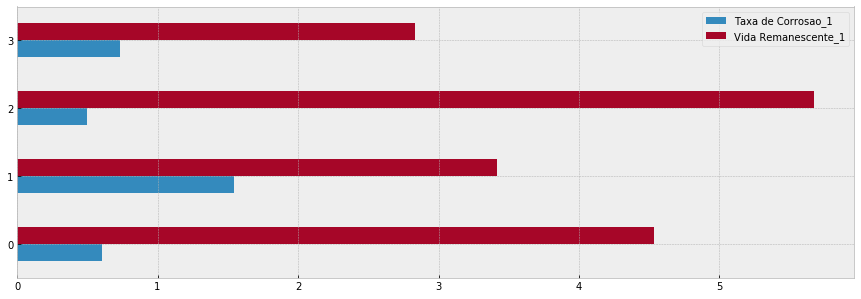

In [13]:
Table[['Taxa de Corrosao_1', 'Vida Remanescente_1']].plot(kind='barh', figsize=(15, 5))
plt.show()

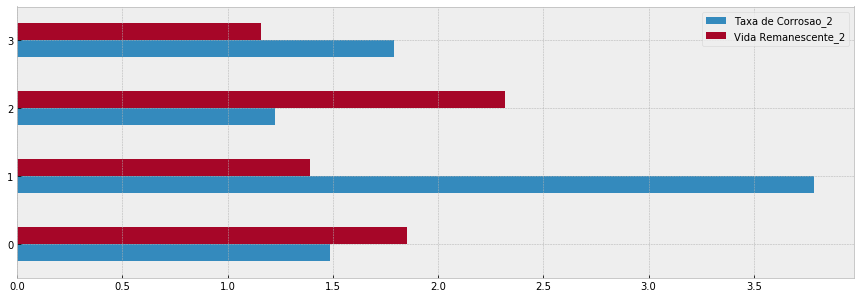

In [14]:
Table[['Taxa de Corrosao_2', 'Vida Remanescente_2']].plot(kind='barh', figsize=(15, 5))
plt.show()

In [15]:
Table.to_excel('Vazos_de_Pressao.xlsx')